In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/home/bradvurt/Загрузки/2. Cup_IT_2022_Датасет_Data_Science.csv")
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,...,73.846425,148.316558,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,...,NaN,NaN,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,NaN,NaN
2,2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,...,NaN,NaN,NaN,6.651813,NaN,NaN,NaN,5.0,NaN,NaN
3,3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,...,NaN,NaN,NaN,NaN,743.245025,NaN,NaN,4.0,104.784828,NaN
4,4,0,1.0,856.579037,8992.835847,NaN,NaN,4914.387768,14.0,663.142041,...,NaN,NaN,NaN,30.906907,NaN,533.725164,2.0,6.0,143.967128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,97.138634,NaN,NaN,NaN,NaN
135057,135057,0,1.0,402.034438,NaN,638.046313,241.225584,NaN,3.0,109.331686,...,65.491622,NaN,NaN,NaN,NaN,197.113099,NaN,NaN,NaN,NaN
135058,135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,...,2.670624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")
sns.set(context='notebook', style='whitegrid', palette='deep',
font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [3]:
a=list(df.columns)
a
for i in a:
    if "rto_11_" in i: print(i)

rto_11_Крупы и зерновые
rto_11_Мясная гастрономия
rto_11_Птица и изделия из птицы
rto_11_Рыба и рыбные изделия
rto_11_Овощи - Фрукты
rto_11_Сыры


In [4]:
df = df.loc[df['cnt_checks_6'] < 50]
df = df.loc[df['cnt_checks_7'] < 50]
df = df.loc[df['cnt_checks_8'] < 50]
df = df.loc[df['cnt_checks_9'] < 50]
df = df.loc[df['cnt_checks_10'] < 50]
df = df.loc[df['cnt_checks_11'] < 50]
df = df.loc[df['cnt_checks_12'] < 50]

In [5]:
df = df.fillna(0)
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,0.0,300.021342,2418.116714,853.016746,0.000000,5092.170392,3.0,0.000000,...,73.846425,148.316558,0.0,0.000000,0.000000,0.000000,0.0,5.0,0.000000,0.0
4,4,0,1.0,856.579037,8992.835847,0.000000,0.000000,4914.387768,14.0,663.142041,...,0.000000,0.000000,0.0,30.906907,0.000000,533.725164,2.0,6.0,143.967128,0.0
5,5,0,7.0,857.167292,11933.515863,1373.399681,1054.092634,10303.841003,11.0,2512.226929,...,69.455478,0.000000,0.0,58.166161,529.238757,2143.918194,5.0,9.0,52.899882,0.0
6,6,0,3.0,525.170598,9326.929213,574.845297,221.761891,7546.807577,18.0,688.440938,...,60.693862,0.000000,0.0,75.974148,0.000000,458.711011,2.0,15.0,112.494544,0.0
7,7,0,1.0,732.849943,3882.067435,0.000000,0.000000,4244.038472,5.0,850.488452,...,0.000000,0.000000,0.0,27.207030,0.000000,422.350400,1.0,6.0,122.710517,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132305,132305,0,1.0,0.000000,1679.869994,978.178244,169.615131,8924.675760,1.0,0.000000,...,55.073104,0.000000,0.0,42.451918,401.020637,184.670656,4.0,7.0,0.000000,0.0
132306,132306,0,2.0,686.411080,1364.351736,193.270633,0.000000,2111.994377,5.0,298.196866,...,0.000000,0.000000,0.0,0.000000,0.000000,323.838489,2.0,4.0,0.000000,0.0
132309,132309,0,0.0,201.178293,482.303886,0.000000,0.000000,1716.652217,5.0,0.000000,...,0.000000,0.000000,0.0,20.348105,0.000000,0.000000,0.0,7.0,0.000000,0.0
132310,132310,0,0.0,0.000000,272.912017,0.000000,0.000000,1808.530157,1.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,4.0,0.000000,0.0


In [6]:
#df["max_rto_Овощи - Фрукты"] = df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].max(axis=1)
#df["max_cnt_checks_Овощи - Фрукты"] = df[["cnt_checks_6_Овощи - Фрукты", "cnt_checks_7_Овощи - Фрукты", "cnt_checks_8_Овощи - Фрукты", "cnt_checks_9_Овощи - Фрукты", "cnt_checks_10_Овощи - Фрукты", "cnt_checks_11_Овощи - Фрукты", "cnt_checks_12_Овощи - Фрукты"]].max(axis=1)
df["mean_rto_Овощи - Фрукты"] = df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].mean(axis=1)
df["mean_cnt_checks_Овощи - Фрукты"] = df[["cnt_checks_6_Овощи - Фрукты", "cnt_checks_7_Овощи - Фрукты", "cnt_checks_8_Овощи - Фрукты", "cnt_checks_9_Овощи - Фрукты", "cnt_checks_10_Овощи - Фрукты", "cnt_checks_11_Овощи - Фрукты", "cnt_checks_12_Овощи - Фрукты"]].mean(axis=1)

In [7]:
#df["max_cnt_checks"] = df[["cnt_checks_6", "cnt_checks_7", "cnt_checks_8", "cnt_checks_9", "cnt_checks_10", "cnt_checks_11", "cnt_checks_12"]].max(axis=1)
df["mean_rto"] = df[["rto_6", "rto_7", "rto_8", "rto_9", "rto_10", "rto_11", "rto_12"]].mean(axis=1)
df["mean_cnt_checks"] = df[["cnt_checks_6", "cnt_checks_7", "cnt_checks_8", "cnt_checks_9", "cnt_checks_10", "cnt_checks_11", "cnt_checks_12"]].mean(axis=1)

In [8]:
#df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты", "max_rto"]]

<AxesSubplot:>

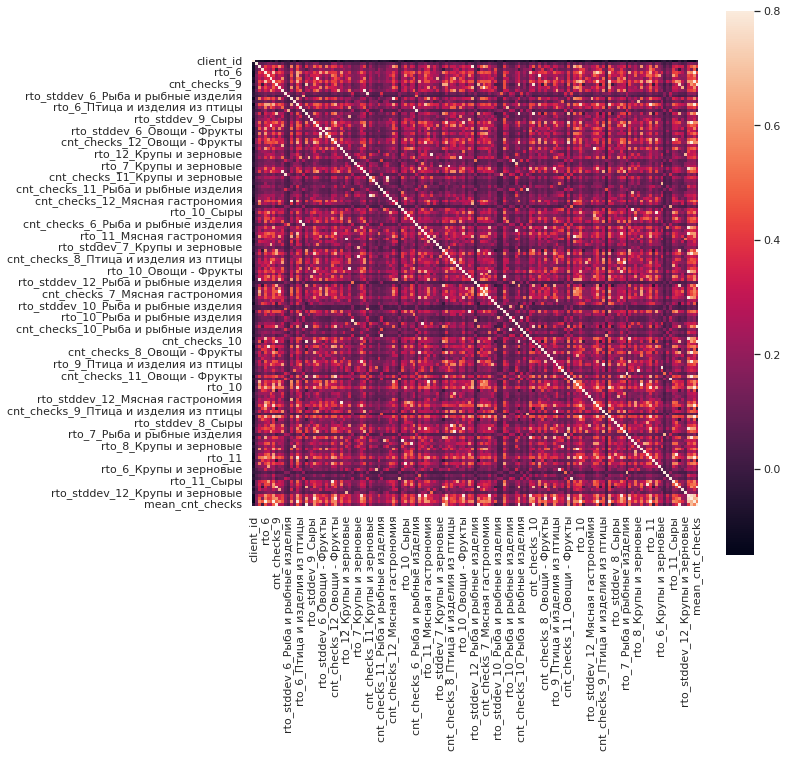

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


corrmat = df.corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [10]:
k = 15

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые,mean_rto_Овощи - Фрукты,mean_cnt_checks_Овощи - Фрукты,mean_rto,mean_cnt_checks
is_in_club,-0.075202,1.000000,0.092459,0.078494,0.105972,0.154783,0.131311,0.116741,0.103140,0.062555,...,0.026744,0.149386,0.140380,0.092847,0.050181,0.069885,0.164664,0.186129,0.151004,0.128308
cnt_checks_12_Овощи - Фрукты,-0.130418,0.191827,0.401879,0.146809,0.404456,0.457998,0.454486,0.424283,0.474138,0.301628,...,0.097125,0.371708,0.379181,0.414457,0.187468,0.204894,0.630703,0.823952,0.570547,0.579998
mean_cnt_checks_Овощи - Фрукты,-0.129590,0.186129,0.469179,0.159444,0.548357,0.393729,0.411466,0.564914,0.595545,0.360096,...,0.120372,0.405078,0.497733,0.567460,0.221295,0.178407,0.758519,1.000000,0.660874,0.684527
cnt_checks_11_Овощи - Фрукты,-0.116952,0.180923,0.412959,0.177603,0.403424,0.359180,0.376945,0.427556,0.486702,0.300826,...,0.100771,0.451186,0.388177,0.425903,0.184824,0.163980,0.636693,0.844342,0.565249,0.586748
cnt_checks_12_Сыры,-0.128073,0.176908,0.406626,0.207781,0.395072,0.816418,0.398074,0.412577,0.319093,0.326688,...,0.084776,0.551476,0.514911,0.277942,0.204049,0.171793,0.440568,0.513870,0.547088,0.392083
cnt_checks_11_Сыры,-0.119576,0.171438,0.419322,0.265644,0.399953,0.537452,0.323702,0.424149,0.327841,0.334998,...,0.091228,0.827190,0.535041,0.284814,0.203715,0.137588,0.445184,0.519986,0.549661,0.395299
mean_rto_Овощи - Фрукты,-0.122189,0.164664,0.362678,0.349167,0.602767,0.450406,0.407969,0.598795,0.334231,0.362192,...,0.163715,0.456153,0.421565,0.312369,0.233788,0.201175,1.000000,0.758519,0.713389,0.388416
cnt_checks_10_Овощи - Фрукты,-0.106304,0.159555,0.493850,0.140676,0.416943,0.331359,0.354274,0.447934,0.509666,0.312644,...,0.098524,0.350831,0.399938,0.437827,0.191980,0.151208,0.652996,0.858360,0.567365,0.578627
rto_12_Овощи - Фрукты,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.127987,0.399458,0.318428,0.212102,0.198334,0.222871,0.824104,0.599448,0.607709,0.313151
cnt_checks_10_Сыры,-0.114741,0.157455,0.533719,0.211945,0.411337,0.505094,0.311320,0.436778,0.343920,0.349576,...,0.089772,0.545383,0.559811,0.291453,0.213493,0.131855,0.441962,0.516389,0.552365,0.393038


In [11]:
df["cor_6"] = df["rto_6_Овощи - Фрукты"]
df["cor_7"] = df["rto_7_Овощи - Фрукты"] * 1.0687
df["cor_8"] = df["rto_8_Овощи - Фрукты"] * 1.1526
df["cor_9"] = df["rto_9_Овощи - Фрукты"] * 1.1342
df["cor_10"] = df["rto_10_Овощи - Фрукты"] * 1.0477
df["cor_11"] = df["rto_11_Овощи - Фрукты"] * 1.0404
df["cor_12"] = df["rto_12_Овощи - Фрукты"] * 1.0049

In [12]:
df[["is_in_club", "cor_6", "cor_7", "cor_8", "cor_9", "cor_10", "cor_11", "cor_12"]].corr()

,is_in_club,cor_6,cor_7,cor_8,cor_9,cor_10,cor_11,cor_12
is_in_club,1.000000,0.116924,0.116342,0.117351,0.125392,0.137204,0.156176,0.157870
cor_6,0.116924,1.000000,0.658400,0.588916,0.570893,0.564052,0.553521,0.534083
cor_7,0.116342,0.658400,1.000000,0.643463,0.577575,0.554683,0.529776,0.498867
cor_8,0.117351,0.588916,0.643463,1.000000,0.677943,0.613708,0.572651,0.534690
cor_9,0.125392,0.570893,0.577575,0.677943,1.000000,0.709022,0.656755,0.603292
cor_10,0.137204,0.564052,0.554683,0.613708,0.709022,1.000000,0.741978,0.667846
cor_11,0.156176,0.553521,0.529776,0.572651,0.656755,0.741978,1.000000,0.733279
cor_12,0.157870,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000


In [13]:
#df["%cor_6"] = df["rto_6_Овощи - Фрукты"] / df["rto_6"]
#df["%cor_7"] = df["rto_7_Овощи - Фрукты"] * 1.0687 / (df["rto_7"] + 0.0687 * df["rto_7_Овощи - Фрукты"])
#df["%cor_8"] = df["rto_8_Овощи - Фрукты"] * 1.1526 / (df["rto_7"] + 0.1526 * df["rto_8_Овощи - Фрукты"])
#df["%cor_9"] = df["rto_9_Овощи - Фрукты"] * 1.1342 / (df["rto_7"] + 0.1342 * df["rto_9_Овощи - Фрукты"])
#df["%cor_10"] = df["rto_10_Овощи - Фрукты"] * 1.0477 / (df["rto_7"] + 0.0477 * df["rto_10_Овощи - Фрукты"])
#df["%cor_11"] = df["rto_11_Овощи - Фрукты"] * 1.0404 / (df["rto_7"] + 0.0404 * df["rto_11_Овощи - Фрукты"])
#df["%cor_12"] = df["rto_12_Овощи - Фрукты"] * 1.0049 / (df["rto_7"] + 0.0049 * df["rto_12_Овощи - Фрукты"])

In [14]:
#df[["is_in_club", "%cor_6", "%cor_7", "%cor_8", "%cor_9", "%cor_10", "%cor_11", "%cor_12", "rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].corr()

In [15]:
corrmat = df.corr()

k = 20

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,mean_cnt_checks_Овощи - Фрукты,mean_rto,mean_cnt_checks,cor_6,cor_7,cor_8,cor_9,cor_10,cor_11,cor_12
is_in_club,-0.075202,1.000000,0.092459,0.078494,0.105972,0.154783,0.131311,0.116741,0.103140,0.062555,...,0.186129,0.151004,0.128308,0.116924,0.116342,0.117351,0.125392,0.137204,0.156176,0.157870
cnt_checks_12_Овощи - Фрукты,-0.130418,0.191827,0.401879,0.146809,0.404456,0.457998,0.454486,0.424283,0.474138,0.301628,...,0.823952,0.570547,0.579998,0.420661,0.418100,0.418717,0.470444,0.510562,0.564197,0.714422
mean_cnt_checks_Овощи - Фрукты,-0.129590,0.186129,0.469179,0.159444,0.548357,0.393729,0.411466,0.564914,0.595545,0.360096,...,1.000000,0.660874,0.684527,0.602959,0.619507,0.610938,0.630760,0.637310,0.634297,0.599448
cnt_checks_11_Овощи - Фрукты,-0.116952,0.180923,0.412959,0.177603,0.403424,0.359180,0.376945,0.427556,0.486702,0.300826,...,0.844342,0.565249,0.586748,0.427675,0.428047,0.435483,0.492764,0.544259,0.723537,0.542185
cnt_checks_12_Сыры,-0.128073,0.176908,0.406626,0.207781,0.395072,0.816418,0.398074,0.412577,0.319093,0.326688,...,0.513870,0.547088,0.392083,0.309553,0.291994,0.287570,0.323178,0.358996,0.399119,0.486475
cnt_checks_11_Сыры,-0.119576,0.171438,0.419322,0.265644,0.399953,0.537452,0.323702,0.424149,0.327841,0.334998,...,0.519986,0.549661,0.395299,0.314514,0.301039,0.302321,0.339430,0.378522,0.488439,0.385793
mean_rto_Овощи - Фрукты,-0.122189,0.164664,0.362678,0.349167,0.602767,0.450406,0.407969,0.598795,0.334231,0.362192,...,0.758519,0.713389,0.388416,0.785050,0.772881,0.791962,0.825357,0.851109,0.849591,0.824104
cnt_checks_10_Овощи - Фрукты,-0.106304,0.159555,0.493850,0.140676,0.416943,0.331359,0.354274,0.447934,0.509666,0.312644,...,0.858360,0.567365,0.578627,0.450158,0.460704,0.474739,0.545796,0.727144,0.561331,0.506055
cor_12,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.599448,0.607709,0.313151,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000
rto_12_Овощи - Фрукты,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.599448,0.607709,0.313151,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000


In [16]:
df["rto_7-6"] = df["rto_7_Овощи - Фрукты"] - df["rto_6_Овощи - Фрукты"]
df["rto_8-7"] = df["rto_8_Овощи - Фрукты"] - df["rto_7_Овощи - Фрукты"]
df["rto_9-8"] = df["rto_9_Овощи - Фрукты"] - df["rto_8_Овощи - Фрукты"]
df["rto_10-9"] = df["rto_10_Овощи - Фрукты"] - df["rto_9_Овощи - Фрукты"]
df["rto_11-10"] = df["rto_11_Овощи - Фрукты"] - df["rto_10_Овощи - Фрукты"]
df["rto_12-11"] = df["rto_12_Овощи - Фрукты"] - df["rto_11_Овощи - Фрукты"]

In [17]:
df[["is_in_club", "rto_7-6", "rto_8-7", "rto_9-8", "rto_10-9", "rto_11-10", "rto_12-11"]].corr()

,is_in_club,rto_7-6,rto_8-7,rto_9-8,rto_10-9,rto_11-10,rto_12-11
is_in_club,1.000000,-0.016738,-0.020149,0.009711,0.049570,0.040657,0.038082
rto_7-6,-0.016738,1.000000,-0.393446,-0.064283,-0.042833,-0.029899,-0.038455
rto_8-7,-0.020149,-0.393446,1.000000,-0.329005,-0.055894,-0.022119,-0.014360
rto_9-8,0.009711,-0.064283,-0.329005,1.000000,-0.290723,-0.008417,-0.004332
rto_10-9,0.049570,-0.042833,-0.055894,-0.290723,1.000000,-0.375833,0.004157
rto_11-10,0.040657,-0.029899,-0.022119,-0.008417,-0.375833,1.000000,-0.310837
rto_12-11,0.038082,-0.038455,-0.014360,-0.004332,0.004157,-0.310837,1.000000


In [18]:
list(df.columns)

['client_id',
 'is_in_club',
 'cnt_checks_10_Мясная гастрономия',
 'rto_std_11',
 'rto_6',
 'rto_12_Сыры',
 'rto_12_Птица и изделия из птицы',
 'rto_8',
 'cnt_checks_9',
 'rto_9_Мясная гастрономия',
 'rto_10_Птица и изделия из птицы',
 'cnt_checks_9_Рыба и рыбные изделия',
 'rto_stddev_6_Рыба и рыбные изделия',
 'rto_12_Мясная гастрономия',
 'rto_stddev_8_Крупы и зерновые',
 'rto_12',
 'rto_6_Птица и изделия из птицы',
 'rto_6_Рыба и рыбные изделия',
 'cnt_checks_11',
 'rto_stddev_7_Птица и изделия из птицы',
 'rto_stddev_9_Сыры',
 'cnt_checks_10_Овощи - Фрукты',
 'cnt_checks_12_Птица и изделия из птицы',
 'rto_6_Мясная гастрономия',
 'rto_stddev_6_Овощи - Фрукты',
 'cnt_checks_6_Мясная гастрономия',
 'rto_stddev_6_Мясная гастрономия',
 'cnt_checks_11_Сыры',
 'cnt_checks_12_Овощи - Фрукты',
 'rto_stddev_10_Птица и изделия из птицы',
 'cnt_checks_6_Сыры',
 'rto_stddev_10_Овощи - Фрукты',
 'rto_12_Крупы и зерновые',
 'rto_7_Птица и изделия из птицы',
 'cnt_checks_12_Рыба и рыбные изделия

In [19]:
from sklearn.utils import shuffle

df = shuffle(df)
df_club = df[df["is_in_club"] == 1].iloc[:8000]
df = df.drop(index = df_club.index)
df_not = df[df["is_in_club"] == 0].iloc[:8000]
df = df.drop(index = df_not.index)
#по 8000 различных членов и не членов клуба
df_shuf = shuffle(pd.concat([df_club, df_not]))

In [20]:
features = [
    'cnt_checks_12_Овощи - Фрукты',
    'cnt_checks_11_Овощи - Фрукты',
    'cnt_checks_10_Овощи - Фрукты',
    'cnt_checks_9_Овощи - Фрукты',
    'cnt_checks_8_Овощи - Фрукты',
    'cnt_checks_7_Овощи - Фрукты',
    'cnt_checks_6_Овощи - Фрукты',
    'rto_12',
    'rto_11',
    'rto_10',
    'rto_9',
    'rto_8',
    'rto_7',
    'rto_6',
    'cnt_checks_12_Сыры',
    'cnt_checks_11_Сыры',
    'cnt_checks_10_Сыры',
    'cnt_checks_9_Сыры',
    'cnt_checks_8_Сыры',
    'cnt_checks_7_Сыры',
    'cnt_checks_6_Сыры',
    'rto_12_Сыры',
    'rto_11_Сыры',
    'rto_10_Сыры',
    'rto_9_Сыры',
    'rto_8_Сыры',
    'rto_7_Сыры',
    'rto_6_Сыры',
    "mean_rto_Овощи - Фрукты",
    "mean_cnt_checks_Овощи - Фрукты",
    "mean_rto",
    "mean_cnt_checks",
    "rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"
]

In [21]:
df[features] = preprocessing.scale(df[features])
df_shuf[features] = preprocessing.scale(df_shuf[features])

In [22]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=1)
fa.fit(df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])
df["data1"] = fa.transform(df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])

fa.fit(df_shuf[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])
df_shuf["data1"] = fa.transform(df_shuf[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])


In [23]:
corrmat = df_shuf.corr()

k = 20

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,cor_10,cor_11,cor_12,rto_7-6,rto_8-7,rto_9-8,rto_10-9,rto_11-10,rto_12-11,data1
is_in_club,-0.105719,1.000000,0.133404,0.130527,0.148003,0.214129,0.169089,0.164404,0.156535,0.087243,...,0.199460,0.225098,0.222577,-0.022153,-0.028312,0.019598,0.074065,0.054872,0.046451,0.231132
cnt_checks_12_Овощи - Фрукты,-0.137244,0.275244,0.395554,0.144331,0.403252,0.464998,0.440668,0.429499,0.501184,0.292625,...,0.505746,0.557577,0.701977,-0.060046,-0.077937,0.069429,0.170011,0.120012,0.337957,0.610121
mean_cnt_checks_Овощи - Фрукты,-0.134260,0.266477,0.462974,0.155067,0.547713,0.407528,0.408071,0.572813,0.624692,0.346145,...,0.627978,0.626949,0.597495,-0.066217,-0.127227,0.019369,0.169990,0.054137,0.096184,0.743032
cnt_checks_11_Овощи - Фрукты,-0.122740,0.257069,0.412551,0.162586,0.401854,0.372488,0.372336,0.433665,0.518968,0.284111,...,0.532114,0.705823,0.538822,-0.058520,-0.072321,0.066530,0.193326,0.299203,-0.089751,0.626648
cnt_checks_12_Сыры,-0.133126,0.245664,0.417740,0.217893,0.401175,0.815720,0.397023,0.435437,0.352704,0.328261,...,0.376642,0.416004,0.496985,-0.062747,-0.058523,0.046385,0.141747,0.090482,0.212559,0.446310
cnt_checks_11_Сыры,-0.122917,0.232569,0.424414,0.253566,0.411685,0.558428,0.329205,0.451585,0.362462,0.325612,...,0.388329,0.494350,0.399316,-0.058647,-0.058628,0.042030,0.148787,0.188244,-0.030410,0.454695
cnt_checks_10_Овощи - Фрукты,-0.112218,0.232279,0.486681,0.137985,0.417119,0.348528,0.349673,0.456322,0.540985,0.300924,...,0.711632,0.558922,0.514358,-0.049867,-0.075977,0.087585,0.377938,-0.158553,0.058662,0.662712
mean_rto_Овощи - Фрукты,-0.122536,0.231752,0.357063,0.382325,0.607832,0.471197,0.407144,0.616457,0.334468,0.359378,...,0.858018,0.850181,0.833119,-0.131586,-0.139752,0.042211,0.260900,0.064637,0.164283,0.996273
data1,-0.118884,0.231132,0.359635,0.381865,0.583975,0.463023,0.402015,0.612303,0.342344,0.360522,...,0.883391,0.860035,0.819167,-0.117140,-0.099665,0.068796,0.268302,0.044365,0.131255,1.000000
cor_11,-0.109896,0.225098,0.311447,0.401659,0.453007,0.429874,0.359277,0.481057,0.268756,0.295910,...,0.749085,1.000000,0.744464,-0.111317,-0.055566,0.099342,0.301535,0.430455,-0.155169,0.860035


<AxesSubplot:>

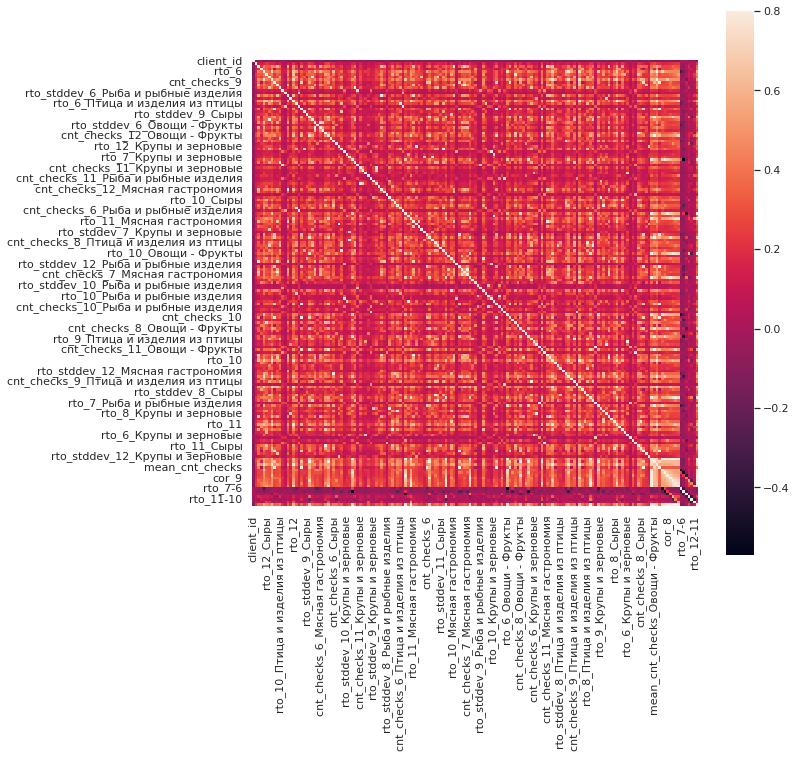

In [24]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [26]:
y = df_shuf['is_in_club']
features = [
    'cnt_checks_12_Овощи - Фрукты',
    'cnt_checks_11_Овощи - Фрукты',
    'cnt_checks_10_Овощи - Фрукты',
    'cnt_checks_9_Овощи - Фрукты',
    'cnt_checks_8_Овощи - Фрукты',
    'cnt_checks_7_Овощи - Фрукты',
    'cnt_checks_6_Овощи - Фрукты',
    "data1",
    'rto_12',
    'rto_11',
    'rto_10',
    'rto_9',
    'rto_8',
    'rto_7',
    'rto_6',
    'cnt_checks_12_Сыры',
    'cnt_checks_11_Сыры',
    'cnt_checks_10_Сыры',
    'cnt_checks_9_Сыры',
    'cnt_checks_8_Сыры',
    'cnt_checks_7_Сыры',
    'cnt_checks_6_Сыры',
    'rto_12_Сыры',
    'rto_11_Сыры',
    'rto_10_Сыры',
    'rto_9_Сыры',
    'rto_8_Сыры',
    'rto_7_Сыры',
    'rto_6_Сыры',
    "mean_rto_Овощи - Фрукты",
    "mean_cnt_checks_Овощи - Фрукты",
    "mean_rto",
    "mean_cnt_checks",
]


n = 2
for i in range(n):
    train_x, val_x, train_y, val_y = df_shuf[features], df[features], df_shuf['is_in_club'], df['is_in_club']
  
    predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  
    model = KNeighborsClassifier()
    model.fit(train_x, train_y)
    print(f"KNN\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    print(f"\nДерево решений\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = RandomForestClassifier()
    model.fit(train_x, train_y)
    print(f"\nСлучайный лес\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = LogisticRegression()
    model.fit(train_x, train_y)
    print(f"\nЛогистическая\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = GaussianNB()
    model.fit(train_x, train_y)
    print(f"\nБайес\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = LinearSVC()
    model.fit(train_x, train_y)
    print(f"\nВекторы\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")
    
    model = CatBoostClassifier()
    model.fit(train_x, train_y)
    print(f"\nCat\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")
    
    #model = XGBClassifier()
    #model.fit(train_x, train_y)
    #predictions[8] = model.predict(val_x)
    #score = precision_score(predictions[8], val_y, pos_label=1)
    #res[8] += score
  
    #model = LGBMClassifier()
    #model.fit(train_x, train_y)
    #predictions[9] = model.predict(val_x)
    #score = precision_score(predictions[9], val_y, pos_label=1)
    #res[9] += score
  
    #predictions[0] = np.round((predictions[1]+predictions[2]+predictions[3]+predictions[4]+predictions[5]+
    #                 predictions[6]+predictions[7]) / 7).astype(int)
    #res[0] += precision_score(predictions[0], val_y, pos_label=1)

"""print('Ансамбль', res[0]/n)
print('KNN', res[1]/n)
print('Деревья решений', res[2]/n)
print('Случайный лес', res[3]/n)
print('Логистическая регрессия', res[4]/n)
print('Наивный метод Байеса', res[5]/n)
print('Метод опорных векторов', res[6]/n)
print('CatBoost', res[7]/n)
#print('XGB', res[8]/n)
#print('LGBM', res[9]/n)"""

KNN
Precision = 0.6674140508221226
Recall = 0.027632515394374477
F1 = 0.053067894815034905

Дерево решений
Precision = 0.6240657698056801
Recall = 0.024568940151827222
F1 = 0.04727663911221832

Случайный лес
Precision = 0.7541106128550075
Recall = 0.030274843975036006
F1 = 0.058212657935729537

Логистическая
Precision = 0.6988041853512705
Recall = 0.03422902328305755
F1 = 0.06526139456969358

Байес
Precision = 0.5396113602391629
Recall = 0.03715329593989605
F1 = 0.06952000385152375

Векторы
Precision = 0.6913303437967115
Recall = 0.03500075677311942
F1 = 0.06662825037816034
Learning rate set to 0.033658
0:	learn: 0.6893342	total: 90.1ms	remaining: 1m 30s
1:	learn: 0.6856573	total: 106ms	remaining: 52.8s
2:	learn: 0.6821521	total: 115ms	remaining: 38.3s
3:	learn: 0.6789981	total: 121ms	remaining: 30.2s
4:	learn: 0.6760913	total: 127ms	remaining: 25.3s
5:	learn: 0.6733358	total: 132ms	remaining: 21.9s
6:	learn: 0.6706770	total: 137ms	remaining: 19.4s
7:	learn: 0.6683541	total: 143ms	rema

169:	learn: 0.6080492	total: 904ms	remaining: 4.41s
170:	learn: 0.6079455	total: 909ms	remaining: 4.41s
171:	learn: 0.6077385	total: 914ms	remaining: 4.4s
172:	learn: 0.6076325	total: 918ms	remaining: 4.39s
173:	learn: 0.6075442	total: 923ms	remaining: 4.38s
174:	learn: 0.6074276	total: 927ms	remaining: 4.37s
175:	learn: 0.6073295	total: 931ms	remaining: 4.36s
176:	learn: 0.6072340	total: 936ms	remaining: 4.35s
177:	learn: 0.6071070	total: 940ms	remaining: 4.34s
178:	learn: 0.6068402	total: 945ms	remaining: 4.33s
179:	learn: 0.6067187	total: 949ms	remaining: 4.32s
180:	learn: 0.6066781	total: 953ms	remaining: 4.31s
181:	learn: 0.6066185	total: 958ms	remaining: 4.31s
182:	learn: 0.6065006	total: 963ms	remaining: 4.3s
183:	learn: 0.6064159	total: 968ms	remaining: 4.29s
184:	learn: 0.6063112	total: 972ms	remaining: 4.28s
185:	learn: 0.6061993	total: 978ms	remaining: 4.28s
186:	learn: 0.6060577	total: 982ms	remaining: 4.27s
187:	learn: 0.6059486	total: 988ms	remaining: 4.27s
188:	learn: 0.

335:	learn: 0.5884780	total: 1.69s	remaining: 3.34s
336:	learn: 0.5882758	total: 1.7s	remaining: 3.34s
337:	learn: 0.5881778	total: 1.7s	remaining: 3.33s
338:	learn: 0.5880444	total: 1.71s	remaining: 3.33s
339:	learn: 0.5878780	total: 1.71s	remaining: 3.32s
340:	learn: 0.5877679	total: 1.72s	remaining: 3.32s
341:	learn: 0.5876837	total: 1.72s	remaining: 3.31s
342:	learn: 0.5875411	total: 1.73s	remaining: 3.31s
343:	learn: 0.5874186	total: 1.73s	remaining: 3.3s
344:	learn: 0.5872744	total: 1.74s	remaining: 3.3s
345:	learn: 0.5871088	total: 1.74s	remaining: 3.29s
346:	learn: 0.5869937	total: 1.75s	remaining: 3.29s
347:	learn: 0.5868710	total: 1.75s	remaining: 3.28s
348:	learn: 0.5867241	total: 1.75s	remaining: 3.27s
349:	learn: 0.5866283	total: 1.76s	remaining: 3.27s
350:	learn: 0.5865259	total: 1.76s	remaining: 3.26s
351:	learn: 0.5863828	total: 1.77s	remaining: 3.26s
352:	learn: 0.5861438	total: 1.77s	remaining: 3.25s
353:	learn: 0.5859889	total: 1.78s	remaining: 3.25s
354:	learn: 0.58

503:	learn: 0.5648579	total: 2.48s	remaining: 2.44s
504:	learn: 0.5647189	total: 2.48s	remaining: 2.43s
505:	learn: 0.5646530	total: 2.49s	remaining: 2.43s
506:	learn: 0.5645569	total: 2.49s	remaining: 2.42s
507:	learn: 0.5644776	total: 2.5s	remaining: 2.42s
508:	learn: 0.5643586	total: 2.5s	remaining: 2.42s
509:	learn: 0.5642200	total: 2.51s	remaining: 2.41s
510:	learn: 0.5641317	total: 2.52s	remaining: 2.41s
511:	learn: 0.5639767	total: 2.52s	remaining: 2.4s
512:	learn: 0.5638923	total: 2.53s	remaining: 2.4s
513:	learn: 0.5637804	total: 2.53s	remaining: 2.4s
514:	learn: 0.5636312	total: 2.54s	remaining: 2.39s
515:	learn: 0.5634805	total: 2.54s	remaining: 2.38s
516:	learn: 0.5634128	total: 2.54s	remaining: 2.38s
517:	learn: 0.5632305	total: 2.55s	remaining: 2.37s
518:	learn: 0.5630872	total: 2.55s	remaining: 2.37s
519:	learn: 0.5629391	total: 2.56s	remaining: 2.36s
520:	learn: 0.5627760	total: 2.56s	remaining: 2.36s
521:	learn: 0.5625573	total: 2.57s	remaining: 2.35s
522:	learn: 0.562

672:	learn: 0.5440741	total: 3.27s	remaining: 1.59s
673:	learn: 0.5440183	total: 3.28s	remaining: 1.59s
674:	learn: 0.5438297	total: 3.29s	remaining: 1.58s
675:	learn: 0.5436532	total: 3.29s	remaining: 1.58s
676:	learn: 0.5435246	total: 3.29s	remaining: 1.57s
677:	learn: 0.5434402	total: 3.3s	remaining: 1.57s
678:	learn: 0.5433476	total: 3.3s	remaining: 1.56s
679:	learn: 0.5432328	total: 3.31s	remaining: 1.56s
680:	learn: 0.5430667	total: 3.31s	remaining: 1.55s
681:	learn: 0.5429274	total: 3.32s	remaining: 1.55s
682:	learn: 0.5428618	total: 3.32s	remaining: 1.54s
683:	learn: 0.5427233	total: 3.32s	remaining: 1.54s
684:	learn: 0.5426236	total: 3.33s	remaining: 1.53s
685:	learn: 0.5425107	total: 3.33s	remaining: 1.52s
686:	learn: 0.5424170	total: 3.34s	remaining: 1.52s
687:	learn: 0.5423033	total: 3.34s	remaining: 1.51s
688:	learn: 0.5421801	total: 3.35s	remaining: 1.51s
689:	learn: 0.5420309	total: 3.35s	remaining: 1.5s
690:	learn: 0.5418870	total: 3.35s	remaining: 1.5s
691:	learn: 0.54

833:	learn: 0.5255290	total: 4.07s	remaining: 809ms
834:	learn: 0.5254009	total: 4.07s	remaining: 804ms
835:	learn: 0.5252983	total: 4.08s	remaining: 800ms
836:	learn: 0.5251748	total: 4.08s	remaining: 795ms
837:	learn: 0.5250935	total: 4.09s	remaining: 790ms
838:	learn: 0.5249612	total: 4.09s	remaining: 786ms
839:	learn: 0.5247787	total: 4.1s	remaining: 781ms
840:	learn: 0.5247377	total: 4.11s	remaining: 777ms
841:	learn: 0.5246563	total: 4.11s	remaining: 772ms
842:	learn: 0.5245657	total: 4.12s	remaining: 767ms
843:	learn: 0.5244887	total: 4.12s	remaining: 762ms
844:	learn: 0.5243620	total: 4.13s	remaining: 757ms
845:	learn: 0.5242717	total: 4.13s	remaining: 752ms
846:	learn: 0.5241264	total: 4.14s	remaining: 748ms
847:	learn: 0.5240250	total: 4.14s	remaining: 743ms
848:	learn: 0.5238793	total: 4.15s	remaining: 738ms
849:	learn: 0.5237569	total: 4.15s	remaining: 733ms
850:	learn: 0.5236553	total: 4.16s	remaining: 728ms
851:	learn: 0.5235469	total: 4.16s	remaining: 723ms
852:	learn: 0

995:	learn: 0.5078474	total: 4.85s	remaining: 19.5ms
996:	learn: 0.5077393	total: 4.85s	remaining: 14.6ms
997:	learn: 0.5076589	total: 4.86s	remaining: 9.74ms
998:	learn: 0.5075987	total: 4.86s	remaining: 4.87ms
999:	learn: 0.5075568	total: 4.87s	remaining: 0us

Cat
Precision = 0.7653213751868461
Recall = 0.030752597753618837
F1 = 0.05912922970319899
KNN
Precision = 0.6674140508221226
Recall = 0.027632515394374477
F1 = 0.053067894815034905

Дерево решений
Precision = 0.6188340807174888
Recall = 0.023504030884523675
F1 = 0.04528797243340808

Случайный лес
Precision = 0.757847533632287
Recall = 0.03057071361813742
F1 = 0.05877068420900107

Логистическая
Precision = 0.6988041853512705
Recall = 0.03422902328305755
F1 = 0.06526139456969358

Байес
Precision = 0.5396113602391629
Recall = 0.03715329593989605
F1 = 0.06952000385152375

Векторы
Precision = 0.6898355754857997
Recall = 0.03482493208572291
F1 = 0.06630270813878314
Learning rate set to 0.033658
0:	learn: 0.6893342	total: 38.5ms	remai

144:	learn: 0.6109406	total: 739ms	remaining: 4.36s
145:	learn: 0.6108045	total: 744ms	remaining: 4.35s
146:	learn: 0.6107129	total: 749ms	remaining: 4.35s
147:	learn: 0.6105826	total: 754ms	remaining: 4.34s
148:	learn: 0.6104669	total: 759ms	remaining: 4.33s
149:	learn: 0.6102541	total: 764ms	remaining: 4.33s
150:	learn: 0.6101224	total: 768ms	remaining: 4.32s
151:	learn: 0.6099710	total: 773ms	remaining: 4.31s
152:	learn: 0.6098869	total: 777ms	remaining: 4.3s
153:	learn: 0.6098330	total: 782ms	remaining: 4.29s
154:	learn: 0.6097463	total: 786ms	remaining: 4.28s
155:	learn: 0.6096767	total: 791ms	remaining: 4.28s
156:	learn: 0.6095934	total: 795ms	remaining: 4.27s
157:	learn: 0.6094996	total: 799ms	remaining: 4.26s
158:	learn: 0.6094070	total: 804ms	remaining: 4.25s
159:	learn: 0.6092863	total: 809ms	remaining: 4.25s
160:	learn: 0.6091710	total: 813ms	remaining: 4.24s
161:	learn: 0.6090021	total: 817ms	remaining: 4.23s
162:	learn: 0.6088885	total: 822ms	remaining: 4.22s
163:	learn: 0

305:	learn: 0.5922838	total: 1.53s	remaining: 3.46s
306:	learn: 0.5921489	total: 1.53s	remaining: 3.46s
307:	learn: 0.5919850	total: 1.54s	remaining: 3.46s
308:	learn: 0.5917907	total: 1.54s	remaining: 3.45s
309:	learn: 0.5916386	total: 1.55s	remaining: 3.45s
310:	learn: 0.5915405	total: 1.55s	remaining: 3.44s
311:	learn: 0.5914275	total: 1.56s	remaining: 3.43s
312:	learn: 0.5913196	total: 1.56s	remaining: 3.43s
313:	learn: 0.5912112	total: 1.57s	remaining: 3.42s
314:	learn: 0.5911492	total: 1.57s	remaining: 3.42s
315:	learn: 0.5910452	total: 1.58s	remaining: 3.41s
316:	learn: 0.5909494	total: 1.58s	remaining: 3.41s
317:	learn: 0.5908101	total: 1.59s	remaining: 3.4s
318:	learn: 0.5906986	total: 1.59s	remaining: 3.4s
319:	learn: 0.5905802	total: 1.59s	remaining: 3.39s
320:	learn: 0.5904503	total: 1.6s	remaining: 3.38s
321:	learn: 0.5902607	total: 1.6s	remaining: 3.38s
322:	learn: 0.5902158	total: 1.61s	remaining: 3.37s
323:	learn: 0.5901044	total: 1.61s	remaining: 3.37s
324:	learn: 0.58

475:	learn: 0.5685556	total: 2.31s	remaining: 2.55s
476:	learn: 0.5684792	total: 2.32s	remaining: 2.54s
477:	learn: 0.5683937	total: 2.32s	remaining: 2.54s
478:	learn: 0.5682319	total: 2.33s	remaining: 2.53s
479:	learn: 0.5680617	total: 2.33s	remaining: 2.52s
480:	learn: 0.5679896	total: 2.33s	remaining: 2.52s
481:	learn: 0.5678737	total: 2.34s	remaining: 2.52s
482:	learn: 0.5677472	total: 2.35s	remaining: 2.51s
483:	learn: 0.5675682	total: 2.35s	remaining: 2.5s
484:	learn: 0.5674480	total: 2.35s	remaining: 2.5s
485:	learn: 0.5672255	total: 2.36s	remaining: 2.49s
486:	learn: 0.5671073	total: 2.36s	remaining: 2.49s
487:	learn: 0.5669839	total: 2.37s	remaining: 2.48s
488:	learn: 0.5668782	total: 2.37s	remaining: 2.48s
489:	learn: 0.5668162	total: 2.38s	remaining: 2.47s
490:	learn: 0.5667124	total: 2.38s	remaining: 2.47s
491:	learn: 0.5665143	total: 2.38s	remaining: 2.46s
492:	learn: 0.5663940	total: 2.39s	remaining: 2.46s
493:	learn: 0.5662631	total: 2.39s	remaining: 2.45s
494:	learn: 0.

650:	learn: 0.5466220	total: 3.1s	remaining: 1.66s
651:	learn: 0.5465241	total: 3.1s	remaining: 1.66s
652:	learn: 0.5463651	total: 3.1s	remaining: 1.65s
653:	learn: 0.5462661	total: 3.11s	remaining: 1.65s
654:	learn: 0.5461050	total: 3.11s	remaining: 1.64s
655:	learn: 0.5459367	total: 3.12s	remaining: 1.64s
656:	learn: 0.5458307	total: 3.12s	remaining: 1.63s
657:	learn: 0.5457644	total: 3.13s	remaining: 1.63s
658:	learn: 0.5456686	total: 3.13s	remaining: 1.62s
659:	learn: 0.5455311	total: 3.14s	remaining: 1.62s
660:	learn: 0.5453743	total: 3.14s	remaining: 1.61s
661:	learn: 0.5452207	total: 3.15s	remaining: 1.61s
662:	learn: 0.5451246	total: 3.15s	remaining: 1.6s
663:	learn: 0.5450193	total: 3.15s	remaining: 1.6s
664:	learn: 0.5449903	total: 3.16s	remaining: 1.59s
665:	learn: 0.5448804	total: 3.16s	remaining: 1.59s
666:	learn: 0.5447397	total: 3.17s	remaining: 1.58s
667:	learn: 0.5445909	total: 3.17s	remaining: 1.58s
668:	learn: 0.5445162	total: 3.18s	remaining: 1.57s
669:	learn: 0.544

815:	learn: 0.5274346	total: 3.88s	remaining: 876ms
816:	learn: 0.5272675	total: 3.89s	remaining: 871ms
817:	learn: 0.5270538	total: 3.89s	remaining: 867ms
818:	learn: 0.5270236	total: 3.9s	remaining: 862ms
819:	learn: 0.5269234	total: 3.9s	remaining: 857ms
820:	learn: 0.5268124	total: 3.91s	remaining: 853ms
821:	learn: 0.5266791	total: 3.91s	remaining: 848ms
822:	learn: 0.5266019	total: 3.92s	remaining: 843ms
823:	learn: 0.5264672	total: 3.92s	remaining: 838ms
824:	learn: 0.5263467	total: 3.93s	remaining: 833ms
825:	learn: 0.5263034	total: 3.93s	remaining: 829ms
826:	learn: 0.5261802	total: 3.94s	remaining: 824ms
827:	learn: 0.5261040	total: 3.94s	remaining: 819ms
828:	learn: 0.5260921	total: 3.95s	remaining: 814ms
829:	learn: 0.5259612	total: 3.95s	remaining: 809ms
830:	learn: 0.5258396	total: 3.96s	remaining: 805ms
831:	learn: 0.5257530	total: 3.96s	remaining: 800ms
832:	learn: 0.5256647	total: 3.96s	remaining: 795ms
833:	learn: 0.5255290	total: 3.97s	remaining: 790ms
834:	learn: 0.

986:	learn: 0.5087704	total: 4.66s	remaining: 61.4ms
987:	learn: 0.5086160	total: 4.67s	remaining: 56.7ms
988:	learn: 0.5084550	total: 4.67s	remaining: 52ms
989:	learn: 0.5083587	total: 4.68s	remaining: 47.3ms
990:	learn: 0.5082616	total: 4.68s	remaining: 42.5ms
991:	learn: 0.5081509	total: 4.69s	remaining: 37.8ms
992:	learn: 0.5080767	total: 4.69s	remaining: 33.1ms
993:	learn: 0.5080136	total: 4.7s	remaining: 28.4ms
994:	learn: 0.5078754	total: 4.7s	remaining: 23.6ms
995:	learn: 0.5078474	total: 4.71s	remaining: 18.9ms
996:	learn: 0.5077393	total: 4.71s	remaining: 14.2ms
997:	learn: 0.5076589	total: 4.71s	remaining: 9.45ms
998:	learn: 0.5075987	total: 4.72s	remaining: 4.72ms
999:	learn: 0.5075568	total: 4.72s	remaining: 0us

Cat
Precision = 0.7653213751868461
Recall = 0.030752597753618837
F1 = 0.05912922970319899


"print('Ансамбль', res[0]/n)\nprint('KNN', res[1]/n)\nprint('Деревья решений', res[2]/n)\nprint('Случайный лес', res[3]/n)\nprint('Логистическая регрессия', res[4]/n)\nprint('Наивный метод Байеса', res[5]/n)\nprint('Метод опорных векторов', res[6]/n)\nprint('CatBoost', res[7]/n)\n#print('XGB', res[8]/n)\n#print('LGBM', res[9]/n)"

In [ ]:
Ансамбль 0.6318160799342344
KNN 0.5779090302795844
Деревья решений 0.5546447468104483
Случайный лес 0.6421652481926545
Логистическая регрессия 0.8447274676209129
Наивный метод Байеса 0.4003484227536127
Метод опорных векторов 0.41827655407529196
CatBoost 0.6561535377225433